<a href="https://colab.research.google.com/github/JayabharathiRavi/D19Task5/blob/main/Copy_of_TASK5_D19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **TASK 5**

Lets import the needed libraries

In [1]:
import pandas as pd
import datetime
import numpy as np
import matplotlib.pyplot as plt


###### I am going to provide two .csv files which is takehome_user_engagement.csv and takehome_users.csv

In [2]:
from google.colab import files
uploaded=files.upload()

Saving takehome_user_engagement.csv to takehome_user_engagement.csv


In [3]:
from google.colab import files
uploaded=files.upload()

Saving takehome_users.csv to takehome_users.csv


In [51]:
df_user_engagement=pd.read_csv('/content/takehome_user_engagement.csv')

In [50]:
df_users = pd.read_csv('/content/takehome_users.csv', encoding='unicode_escape')

In [52]:
df_user_engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [53]:
df_users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


Check are there any nan values in takehome_user_engagement and takehome_users



> df_user_engagement



In [54]:
# put zero for NaN values
df_user_engagement = df_user_engagement.fillna(0)

In [55]:
df_user_engagement[df_user_engagement.isnull()].count()

time_stamp    0
user_id       0
visited       0
dtype: int64

In [56]:
df_user_engagement.describe()

,user_id,visited
count,207917.000000,207917.0
mean,5913.314197,1.0
std,3394.941674,0.0
min,1.000000,1.0
25%,3087.000000,1.0
50%,5682.000000,1.0
75%,8944.000000,1.0
max,12000.000000,1.0




>df_users



In [57]:
# put zero for NaN values
df_users = df_users.fillna(0)

In [58]:
df_users[df_users.isnull()].count()

object_id                     0
creation_time                 0
name                          0
email                         0
creation_source               0
last_session_creation_time    0
opted_in_to_mailing_list      0
enabled_for_marketing_drip    0
org_id                        0
invited_by_user_id            0
dtype: int64

In [59]:
df_users.describe()

,object_id,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
count,12000.00000,1.200000e+04,12000.000000,12000.000000,12000.000000,12000.000000
mean,6000.50000,1.014115e+09,0.249500,0.149333,141.884583,3188.691333
std,3464.24595,6.087938e+08,0.432742,0.356432,124.056723,3869.027693
min,1.00000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,3000.75000,0.000000e+00,0.000000,0.000000,29.000000,0.000000
50%,6000.50000,1.368880e+09,0.000000,0.000000,108.000000,875.000000
75%,9000.25000,1.393729e+09,0.000000,0.000000,238.250000,6317.000000
max,12000.00000,1.402067e+09,1.000000,1.000000,416.000000,11999.000000


In [ ]:
#Now there is no NAN values in both takehome_user_engagement and takehome_users

The Dataset takehome_user_engagement.csv, will be used to determine whether any particular user is an adopted user or not.
(adopted user -a user who has logged into the product on three separate days in at least one seven day period). 

# Timestamp

In [60]:
df_user_engagement['TIME_STAMP'] = pd.to_datetime(df_user_engagement['time_stamp'])

# user_id

In [61]:
df_user_engagement['user_id']

0             1
1             2
2             2
3             2
4             2
          ...  
207912    11996
207913    11997
207914    11998
207915    11999
207916    12000
Name: user_id, Length: 207917, dtype: int64

In [62]:
sorted(list(df_user_engagement['user_id'].unique()))

[1,
 2,
 3,
 4,
 5,
 6,
 7,
 10,
 11,
 13,
 14,
 17,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 27,
 28,
 29,
 30,
 31,
 33,
 36,
 37,
 41,
 42,
 43,
 44,
 45,
 46,
 47,
 48,
 49,
 50,
 51,
 53,
 54,
 55,
 56,
 57,
 58,
 59,
 60,
 61,
 63,
 64,
 65,
 66,
 67,
 68,
 69,
 72,
 73,
 74,
 75,
 76,
 77,
 78,
 80,
 81,
 82,
 83,
 84,
 85,
 86,
 87,
 88,
 89,
 90,
 91,
 92,
 94,
 95,
 96,
 97,
 98,
 99,
 100,
 101,
 103,
 105,
 106,
 107,
 109,
 110,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 119,
 121,
 123,
 124,
 125,
 126,
 127,
 128,
 132,
 133,
 135,
 136,
 138,
 139,
 140,
 141,
 142,
 143,
 144,
 146,
 147,
 150,
 151,
 153,
 154,
 155,
 156,
 158,
 159,
 160,
 161,
 162,
 164,
 165,
 167,
 168,
 171,
 172,
 173,
 174,
 175,
 176,
 178,
 179,
 180,
 181,
 182,
 183,
 184,
 185,
 187,
 188,
 189,
 193,
 195,
 196,
 197,
 198,
 200,
 201,
 202,
 203,
 204,
 205,
 206,
 208,
 209,
 210,
 211,
 212,
 213,
 214,
 215,
 216,
 217,
 219,
 220,
 221,
 222,
 223,
 225,
 226,
 227,
 228,
 230,
 232,
 

# Visited

In [64]:
df_user_engagement['visited']

0         1
1         1
2         1
3         1
4         1
         ..
207912    1
207913    1
207914    1
207915    1
207916    1
Name: visited, Length: 207917, dtype: int64

In [65]:
sorted(list(df_user_engagement['visited'].unique()))

[1]

# Object_id

> Verify is there any duplicate object_id in df_users

In [66]:
df_users[df_users['object_id'].duplicated()]

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id


In [ ]:
#There is no duplicated values in object_id

In [67]:
df_users['Creation_time'] = pd.to_datetime(df_users['creation_time'])
df_users['Creation_time']

0       2014-04-22 03:53:30
1       2013-11-15 03:45:04
2       2013-03-19 23:14:52
3       2013-05-21 08:09:28
4       2013-01-17 10:14:20
                ...        
11995   2013-09-06 06:14:15
11996   2013-01-10 18:28:37
11997   2014-04-27 12:45:16
11998   2012-05-31 11:55:59
11999   2014-01-26 08:57:12
Name: Creation_time, Length: 12000, dtype: datetime64[ns]

# Name

In [68]:
print(len(df_users[df_users.name == 0]))

0


# email

In [69]:
print(len(df_users[df_users.email == 0]))


0


# Creation_scorce

In [70]:
print(len(df_users[df_users.creation_source == 0]))


0




> Analysising creation source through pie chart

In [71]:
df_users.creation_source.value_counts()

ORG_INVITE            4254
GUEST_INVITE          2163
PERSONAL_PROJECTS     2111
SIGNUP                2087
SIGNUP_GOOGLE_AUTH    1385
Name: creation_source, dtype: int64



>  Create a pie chart


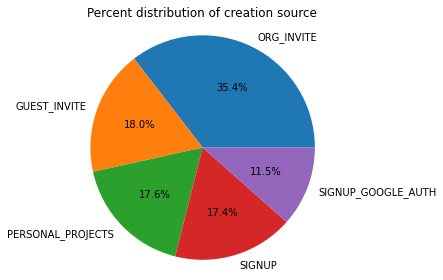

In [72]:
# create dataframe for creation source
df_source = df_users.creation_source.value_counts()
df_source = df_source.reset_index()

# Put parameter values
plt.pie(df_source['creation_source'],labels=df_source['index'],
        autopct='%1.1f%%')

plt.title('Percent distribution of creation source')
plt.axis('equal')
plt.tight_layout()
plt.show()

# Opted_in_to_mailing_list

In [73]:
df_users.opted_in_to_mailing_list.value_counts()

0    9006
1    2994
Name: opted_in_to_mailing_list, dtype: int64



>  Create a pie chart


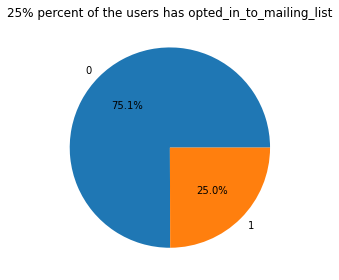

In [74]:
df_mail = df_users.opted_in_to_mailing_list.value_counts()
df_mail = df_mail.reset_index()
plt.pie(
    df_mail['opted_in_to_mailing_list'],
    labels=df_mail['index'],
    autopct='%1.1f%%'
    )

plt.title('25% percent of the users has opted_in_to_mailing_list')
plt.tight_layout()
plt.show()

# Enabled_for_marketing_drip

In [75]:
df_users.enabled_for_marketing_drip.value_counts()

0    10208
1     1792
Name: enabled_for_marketing_drip, dtype: int64

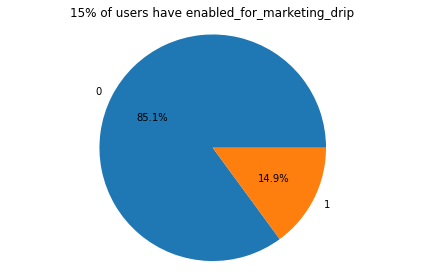

In [76]:
df_drip = df_users.enabled_for_marketing_drip.value_counts()
df_drip = df_drip.reset_index()

plt.pie(
    df_drip['enabled_for_marketing_drip'],
    labels=df_drip['index'],
    autopct='%1.1f%%'
    )

plt.title('15% of users have enabled_for_marketing_drip')
plt.axis('equal')

plt.tight_layout()
plt.show()

## Org_id


>  what organization has the most users?


In [77]:
df_users.org_id.value_counts().head(10)

0     319
1     233
2     201
3     168
4     159
6     138
5     128
9     124
7     119
10    104
Name: org_id, dtype: int64

In [ ]:
# most users belong to organization id: 0 -> 10 except 8

# Invited_by_user_id

> who invited most users



In [78]:
df_users.invited_by_user_id.value_counts().head(10)

0.0        5583
10741.0      13
2527.0       12
1525.0       11
2308.0       11
11770.0      11
2354.0       10
10628.0      10
7012.0       10
4803.0       10
Name: invited_by_user_id, dtype: int64

# Features

In [79]:
for feature in ['creation_source', 'opted_in_to_mailing_list', 'enabled_for_marketing_drip']:
    print('{} feature:'.format(feature))
    print(df_users[feature].value_counts(), end='\n\n')

creation_source feature:
ORG_INVITE            4254
GUEST_INVITE          2163
PERSONAL_PROJECTS     2111
SIGNUP                2087
SIGNUP_GOOGLE_AUTH    1385
Name: creation_source, dtype: int64

opted_in_to_mailing_list feature:
0    9006
1    2994
Name: opted_in_to_mailing_list, dtype: int64

enabled_for_marketing_drip feature:
0    10208
1     1792
Name: enabled_for_marketing_drip, dtype: int64



 
# create dataframe with users that has logged into the product on three separate days in at least one sevenday period



In [80]:
df_adoption = df_user_engagement.groupby(['user_id', pd.Grouper(key='TIME_STAMP',freq='7D')]).filter(lambda x: len(x)>1).groupby('user_id').sum()
# reset index
df_adoption = df_adoption.reset_index()

In [81]:
df_adoption.head()

,user_id,visited
0,2,4
1,10,277
2,20,2
3,25,2
4,33,12




> merge users and adopted users dataframe

> drop column user_id since it is duplicate with object_id

> replace NaN with zero



In [82]:
df = df_users.merge(df_adoption, left_on='object_id', right_on='user_id', how='outer')
df.drop('user_id', axis=1, inplace=True)
df = df.fillna(0)



> convert unix timestamp to datetime


In [83]:
from datetime import datetime
df['last_session_creation_time'] = df['last_session_creation_time'].apply(
    lambda x: datetime.strptime(str(datetime.fromtimestamp(float(int(x)))), '%Y-%m-%d %H:%M:%S'))
df['creation_time'] = df['creation_time'].apply(lambda x: datetime.strptime(str(x), '%Y-%m-%d %H:%M:%S'))

calculate active days

In [84]:
df['days_since_signup'] = df['last_session_creation_time'] - df['creation_time']
df['days_since_signup'] = df['days_since_signup'].apply(lambda x: abs(x.total_seconds()/60/60/24/30)) 

convert creation_source into numeric values

In [85]:
df['creation_source']= df['creation_source'].astype('category')
cat_columns = df.select_dtypes(['category']).columns
df[cat_columns] = df[cat_columns].apply(lambda x: x.cat.codes)

create adopted_user column

In [86]:
df['adopted_user']=df['visited'].apply(lambda x: int(x > 0))
# column visited is not needed so drop it
df.drop('visited', axis=1, inplace=True)

In [87]:
df.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id,Creation_time,days_since_signup,adopted_user
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,0,2014-04-22 03:53:30,1,0,11,10803.0,2014-04-22 03:53:30,0.000000,0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,1,2014-03-31 03:45:04,0,0,1,316.0,2013-11-15 03:45:04,4.533333,1
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,1,2013-03-19 23:14:52,0,0,94,1525.0,2013-03-19 23:14:52,0.000000,0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,0,2013-05-22 08:09:28,0,0,1,5151.0,2013-05-21 08:09:28,0.033333,0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,0,2013-01-22 10:14:20,0,0,193,5240.0,2013-01-17 10:14:20,0.166667,0


construct the dataset X, y


In [88]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X = df[['creation_source', 'opted_in_to_mailing_list', 'enabled_for_marketing_drip', 'days_since_signup']]
y = (df.adopted_user == 1)

Split the data into a training and test set.


In [90]:
Xlr, Xtestlr, ylr, ytestlr = train_test_split(X.values, y.values, test_size=0.20, random_state=5)

In [91]:
clf = LogisticRegression()

Fit the model on the trainng data.


In [92]:
clf.fit(Xlr, ylr)

LogisticRegression()

Print the accuracy from the testing data.


In [93]:
print("Accuracy score: ", accuracy_score(clf.predict(Xtestlr), ytestlr))

Accuracy score:  0.8395833333333333


Print importance of each features


In [94]:
clf.fit(Xlr / np.std(Xlr, 0), ylr)
print("Regression coefficients: ", clf.coef_)
print("Intecept: ", clf.intercept_) 
print("Column names: ", (X.columns.values))

Regression coefficients:  [[-0.13656159  0.03903875 -0.01274267 -1.5935483 ]]
Intecept:  [-1.05498425]
Column names:  ['creation_source' 'opted_in_to_mailing_list' 'enabled_for_marketing_drip'
 'days_since_signup']


# End Result:

*   Here, I used Logistic Regression Algorithm.
*   Where the target variable is binary 0 and 1.
*   If the user is adopted (1) or not (0). 

*   The features are 'creation_source', 'opted_in_to_mailing_list',      'enabled_for_marketing_drip', 'days_since_signup'.

*  Accuracy score is 83.95%
*  The Regression coefficients are [[-0.13656159  0.03903875 -0.01274267 -1.
5935483 ]]

